In [2]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

### **Exercise 3: Multiple Solutions and Efficiency**

**Objective:** Observe how the density of solutions () affects the speed of the algorithm.

**Task:**

1. Define a list of **4** marked states in a 4-qubit system (e.g., `["0000", "0101", "1010", "1111"]`).
2. Calculate the `optimal_num_iterations` using the code provided in the notebook.
3. **Question:** With 4 solutions out of 16 possibilities (), the fraction of marked states is . Theoretically, a single Grover iteration is often sufficient or even perfect for specific ratios. Check the result—is the optimal iteration count 1? Does the histogram show a high success rate?



Optimal number of iterations for 4 solutions: 1


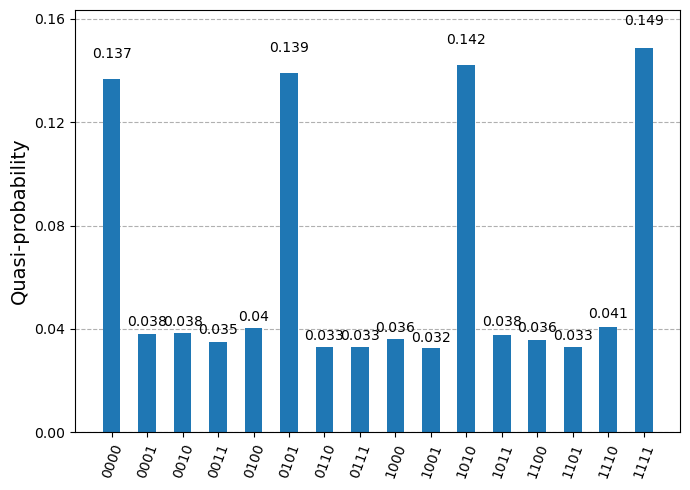

In [3]:
# [Student Code Cell for Exercise 3]

# 1. Define single or double or triple or four marked states

marked_states_ex3 = ["0000", "0101", "1010", "1111"]


# 2. Construct Oracle/Operator
oracle_ex3 = Grover_oracle(marked_states_ex3)
grover_op_ex3 = Grover_operator(oracle_ex3)


# 3. Calculate optimal iterations
optimal_iter_ex3 = math.floor(
    np.pi /
    (4 * np.asin(math.sqrt(len(marked_states_ex3) / 2**grover_op_ex3.num_qubits)))
)
print(f"Optimal number of iterations for 4 solutions: {optimal_iter_ex3}")

# 4. Create Circuit
qc_ex3 = QuantumCircuit(grover_op_ex3.num_qubits)
qc_ex3.h(range(grover_op_ex3.num_qubits))
qc_ex3.compose(grover_op_ex3.power(optimal_iter_ex3), inplace=True)
qc_ex3.measure_all()


# 5. Run on backend using the fake provider and 10000 shots

data_ex3 = Get_Data_from_Fake_backend(10000, qc_ex3, FakeAlgiers())

# 6. Plot the results

plot_distribution(data_ex3.meas.get_counts())